In [1]:
import numpy as np
import pandas as pd

In [2]:
db_covid_start = pd.read_csv("dataset covid.csv")

COMANDA 1: Si richiede di verificare le dimensioni del dataset e i relativi metadati;

In [3]:
print("Il DB dei dati sull'andamento del covid contiene:\n", "RIGHE:", db_covid_start.shape[0], "\n", "COLONNE:", db_covid_start.shape[1])

Il DB dei dati sull'andamento del covid contiene:
 RIGHE: 387295 
 COLONNE: 67


In [4]:
print("Le colonne del DB sono:")
db_covid_start.columns

Le colonne del DB sono:


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
#Studio quanti valori non nulli contengono le colonne e il datatype di ogni colonna, mi ricavo così anche gli indici non categorici per ogni colonna.
db_covid_start.info()
#Dallo studio noto che le uniche colonne non contenenti valori nulli espliciti sono "iso_code", "location", "date" e "population"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387295 entries, 0 to 387294
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387295 non-null  object 
 1   continent                                   368751 non-null  object 
 2   location                                    387295 non-null  object 
 3   date                                        387295 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [6]:
#Studio quanti valori univoci ci sono per ogni colonna.
db_covid_start.nunique()

iso_code                                     255
continent                                      6
location                                     255
date                                        1554
total_cases                                34417
                                           ...  
population                                   255
excess_mortality_cumulative_absolute       12983
excess_mortality_cumulative                 4185
excess_mortality                            5431
excess_mortality_cumulative_per_million    13123
Length: 67, dtype: int64

In [7]:
#Mi creo un'estrazione randomica di 10 righe del DB per studiare il comportamento delle colonne di tipo object "iso_code", "continent", "location" e "date"
db_covid_start.sample(10)
#Nella colonna "iso_code" troviamo il codice distintivo per ogni "location", nella colonna "continent" trovo il continente a cui appartiene la "location" e presenta dei dati NaN.

iso_code      continent      location        date  total_cases  \
343212      TLS           Asia         Timor  2020-04-18          2.0   
182144      KGZ           Asia    Kyrgyzstan  2023-02-10      88486.0   
35422       BEN         Africa         Benin  2020-04-18         35.0   
46130       BRA  South America        Brazil  2020-03-19         84.0   
91608       DMA  North America      Dominica  2022-10-13      15760.0   
320534      ZAF         Africa  South Africa  2020-09-28     669498.0   
158936      IRN           Asia          Iran  2022-08-08    7434945.0   
114892      FJI        Oceania          Fiji  2023-11-19      69047.0   
256762      NOR         Europe        Norway  2021-12-11     286705.0   
327949      LKA           Asia     Sri Lanka  2020-01-17          NaN   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
343212        0.0               0.143           NaN         0.0   
182144        0.0               1.000        1024.0         0.0   
35422         0.0               3.143           NaN         0.0   
46130         0.0              10.143           NaN         0.0   
91608         0.0               1.857          74.0         0.0   
320534        0.0            1406.000       18862.0         0.0   
158936        0.0            7663.714      142398.0         0.0   
114892        0.0               0.000         885.0         0.0   
256762        0.0            3650.571        1197.0         0.0   
327949        0.0               0.000           NaN         0.0   

        new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
343212                0.000  ...          78.1                  28.178   
182144                0.000  ...          50.5                  89.220   
35422                 0.000  ...          12.3                  11.035   
46130                 0.000  ...          17.9                     NaN   
91608                 0.000  ...           NaN                     NaN   
320534               62.286  ...          33.2                  43.993   
158936               65.857  ...          21.1                     NaN   
114892                0.000  ...          34.8                     NaN   
256762                7.571  ...          20.7                     NaN   
327949                0.000  ...          27.0                     NaN   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
343212                        5.90            69.50                    0.606   
182144                        4.50            71.45                    0.697   
35422                         0.50            61.77                    0.545   
46130                         2.20            75.88                    0.765   
91608                         3.80            75.00                    0.742   
320534                        2.32            64.13                    0.709   
158936                        1.50            76.68                    0.783   
114892                        2.30            67.44                    0.743   
256762                        3.60            82.40                    0.957   
327949                        3.60            76.98                    0.782   

         population  excess_mortality_cumulative_absolute  \
343212    1341298.0                                   NaN   
182144    6630621.0                                   NaN   
35422    13352864.0                                   NaN   
46130   215313504.0                                   NaN   
91608       72758.0                                   NaN   
320534   59893884.0                                   NaN   
158936   88550568.0                                   NaN   
114892     929769.0                                   NaN   
256762    5434324.0                                   NaN   
327949   21832150.0                                   NaN   

        excess_mortality_cumulative  excess_mortality  \
343212                          NaN     

In [8]:
#Studio i dati NaN della colonna "continent"
filtro_nan_continent = db_covid_start.continent.isna()
db_covid_nan_continent = db_covid_start.loc[filtro_nan_continent]
db_covid_nan_continent.location.unique() #array dei valori distinti per la colonna "location" nel DB filtrato dove la colonna "continent" contiene solo valori nulli.

#Dallo studio evince che laddove "continent" è NaN, le "location" non sono più regioni ma recap di ogni singolo continente,
# dove nel valore di "location" troviamo "income" si parla per divisione in base al reddito, e infine dove "location" è "world" è un recap dei dati di tutto il mondo.

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'Low income', 'Lower middle income', 'North America', 'Oceania',
       'South America', 'Upper middle income', 'World'], dtype=object)

COMANDA 2: Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di
non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [9]:
# Creo un Db dal Db di inizio senza i valori Nan nella colonna "Continent", tenendo anche le colonne che mi servono relative ai casi, quindi le colonne da indice 0 a indice 7
db_covid_cases = db_covid_start.loc[~filtro_nan_continent]
db_covid_cases = db_covid_cases.iloc[:, 0:7]
db_covid_cases.groupby("continent") #creo un groupby per continente da cui mi sommerò la colonna "new_cases" ricavando i casi totali per continente.
#non utilizzo la colonna "total_cases" perchè è un cumulativo, anche ricavandomi il max per ogni continente ho notato degli sbagli di calcolo utilizzando un altro notebook
db_covid_cases_groupby = db_covid_cases.groupby("continent")
print("I casi totali per continente sono:\n", db_covid_cases_groupby.new_cases.sum())

I casi totali per continente sono:
 continent
Africa            13141282.0
Asia             301446461.0
Europe           252376812.0
North America    124530643.0
Oceania           14808170.0
South America     68718448.0
Name: new_cases, dtype: float64


COMANDA 3: Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne
confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali
nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [10]:
filtro_world = db_covid_start.location == "World"
casi_totali_tc = db_covid_start.loc[filtro_world].total_cases.max()
print("Il totale dei casi nel mondo secondo la colonna 'total_cases' è:",casi_totali_tc) #totale dei casi nel mondo per la colonna "total_cases"
casi_totali_nc = db_covid_cases_groupby.new_cases.sum().sum()
print("Il totale dei casi nel mondo secondo la colonna 'new_cases' è:",db_covid_cases_groupby.new_cases.sum().sum())

Il totale dei casi nel mondo secondo la colonna 'total_cases' è: 774954379.0
Il totale dei casi nel mondo secondo la colonna 'new_cases' è: 775021816.0


In [11]:
continenti = db_covid_cases.continent.unique().tolist()
print("La lista dei continenti è:", continenti)
print("MASSIMO DI CASI IN UN GIORNO")
for continente in continenti:
    max_groupby = db_covid_cases.groupby(["continent","location"]).new_cases.max()
    max_continente = max_groupby.loc[continente].max()
    print("Il max dei casi in un giorno per il continente", continente, "è:", max_continente)
print("MEDIA DEI CASI AL GIORNO")
for continente in continenti:
    mean_groupby = db_covid_cases.groupby(["continent","location"]).new_cases.mean()
    mean_continente = mean_groupby.loc[continente].mean().round(2)
    print("La media dei casi per il continente", continente, "è:", mean_continente)
print("PERCENTUALE DEI CASI TOTALI RISPETTO AL MONDO")
for continente in continenti:
    casi_totali_mondo = db_covid_cases_groupby.new_cases.sum().sum()
    casi_totali_continente = db_covid_cases_groupby.new_cases.sum()
    print("La percentuale dei casi totali del continente", continente, "rispetto al totale dei casi del mondo è:",(((casi_totali_continente[continente]/casi_totali_mondo)*100).round(2)),"%")

La lista dei continenti è: ['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']
MASSIMO DI CASI IN UN GIORNO
Il max dei casi in un giorno per il continente Asia è: 40475477.0
Il max dei casi in un giorno per il continente Europe è: 2417043.0
Il max dei casi in un giorno per il continente Africa è: 162987.0
Il max dei casi in un giorno per il continente Oceania è: 588813.0
Il max dei casi in un giorno per il continente North America è: 5650933.0
Il max dei casi in un giorno per il continente South America è: 1283024.0
MEDIA DEI CASI AL GIORNO
La media dei casi per il continente Asia è: 4181.15
La media dei casi per il continente Europe è: 3459.36
La media dei casi per il continente Africa è: 150.3
La media dei casi per il continente Oceania è: 402.22
La media dei casi per il continente North America è: 2383.17
La media dei casi per il continente South America è: 3199.81
PERCENTUALE DEI CASI TOTALI RISPETTO AL MONDO
La percentuale dei casi totali del continente Asia 

COMANDA 4: Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla 
data.
 Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).
Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se  i
sono similarità con l'andamento del numero dei casi totali;

In [12]:
#Per prima cosa filtro il db per tutti i valori in cui "location" è uguale a "Italy", utilizzando il DB che ho filtrato con solo le colonne dei casi
filtro_italia = db_covid_cases.location == "Italy"
covid_italia = db_covid_cases.loc[filtro_italia]
#trasformo la colonna "date" in una colonna di tipo datetime
covid_italia["date"] = pd.to_datetime(covid_italia["date"], format = "%Y-%m-%d")
#covid_italia.info() per provare il dtype della colonna "date"
#creo il filtro per l'anno 2022
filtro_2022 = covid_italia.date.dt.year == 2022
#Aggiungo il filtro per avere il DB corretto che mi serve 
covid_italia_22 = covid_italia.loc[filtro_2022]
covid_italia_22

C:\Users\Utente\AppData\Local\Temp\ipykernel_4324\3851498053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_italia["date"] = pd.to_datetime(covid_italia["date"], format = "%Y-%m-%d")


iso_code continent location       date  total_cases  new_cases  \
166387      ITA    Europe    Italy 2022-01-01    5622431.0        0.0   
166388      ITA    Europe    Italy 2022-01-02    6267035.0   644604.0   
166389      ITA    Europe    Italy 2022-01-03    6267035.0        0.0   
166390      ITA    Europe    Italy 2022-01-04    6267035.0        0.0   
166391      ITA    Europe    Italy 2022-01-05    6267035.0        0.0   
...         ...       ...      ...        ...          ...        ...   
166747      ITA    Europe    Italy 2022-12-27   25060503.0        0.0   
166748      ITA    Europe    Italy 2022-12-28   25060503.0        0.0   
166749      ITA    Europe    Italy 2022-12-29   25060503.0        0.0   
166750      ITA    Europe    Italy 2022-12-30   25060503.0        0.0   
166751      ITA    Europe    Italy 2022-12-31   25060503.0        0.0   

        new_cases_smoothed  
166387           36797.000  
166388           92086.286  
166389           92086.286  
166390           92086.286  
166391           92086.286  
...                    ...  
166747           18918.143  
166748           18918.143  
166749           18918.143  
166750           18918.143  
166751           18918.143  

[365 rows x 7 columns]

In [13]:
import matplotlib.pyplot as plt #importo la libreria Matplotlib.pyplot per gestire dimensioni dei grafici
import seaborn as sns #importo la libreria Seaborn per fare i grafici

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='total_cases'>

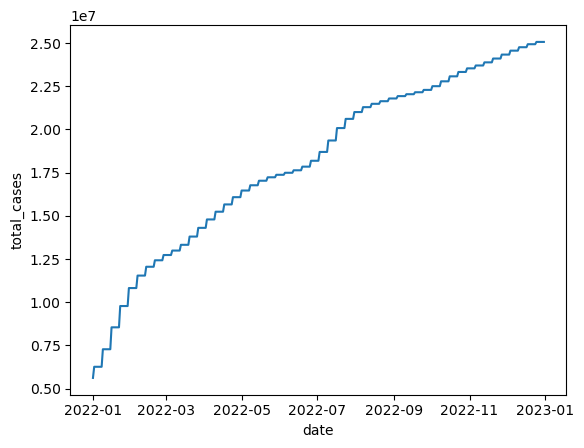

In [14]:
#Mostro con un grafico adeguato l'evoluzione dei casi totali rispetto alla data
italia_date_tc = covid_italia_22.loc[:, ["date","total_cases"]]
sns.lineplot(data=italia_date_tc, x="date", y="total_cases")

<Axes: xlabel='date', ylabel='new_cases'>

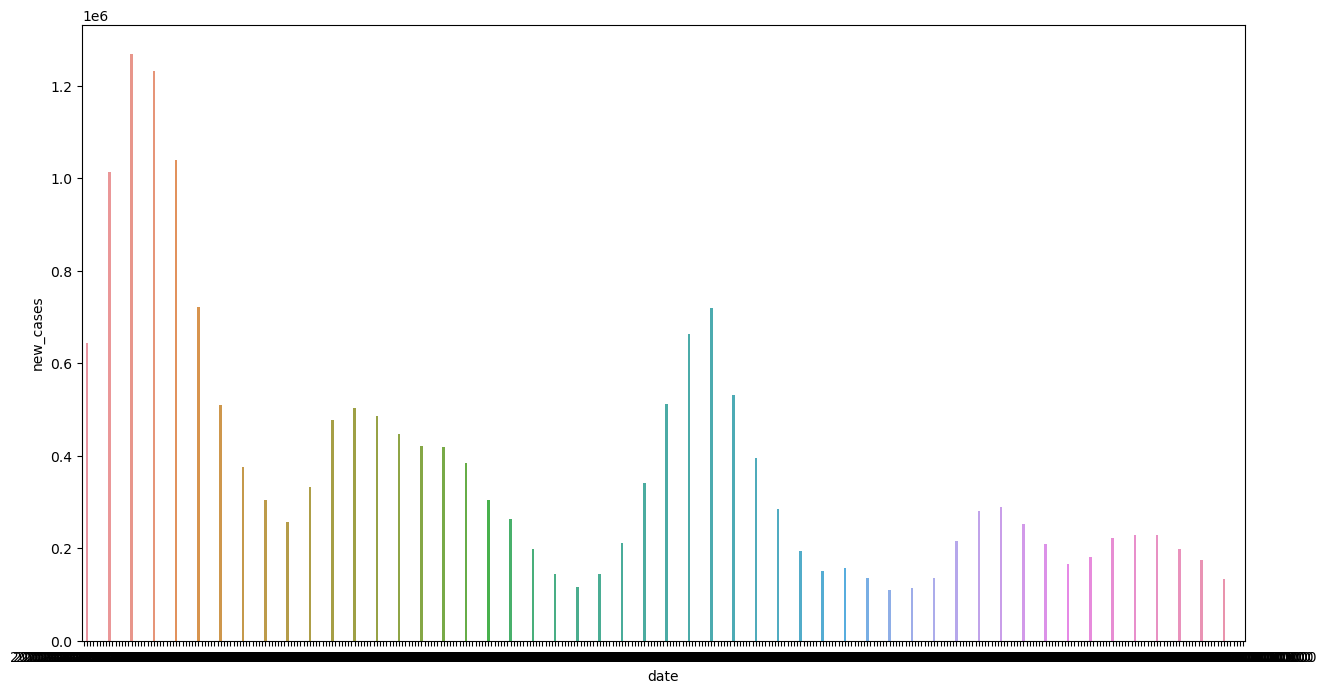

In [15]:
#Mostro poi con un grafico il numero di nuovi casi rispetto alla data
italia_date_nc = covid_italia_22.loc[:, ["date","new_cases"]]
plt.figure(figsize=(15, 8))
sns.barplot(data= italia_date_nc, x="date", y="new_cases")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='cumsum_nc'>

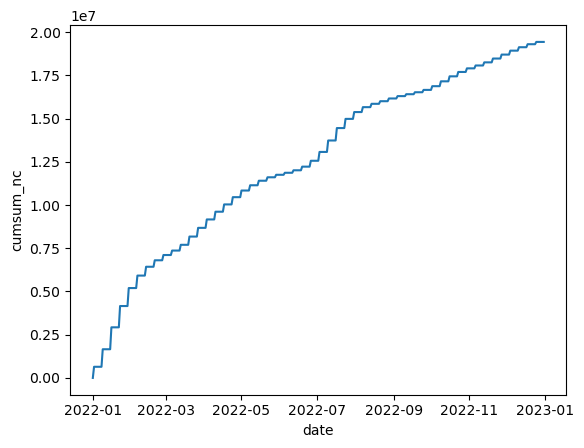

In [16]:
#Mostro infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022
italia_date_nc.loc[:, "cumsum_nc"] = italia_date_nc.new_cases.cumsum()
sns.lineplot(data=italia_date_nc, x="date", y="cumsum_nc")

CONSIDERAZIONI: essendo la colonna "total_cases" cumulativa della colonna "new_cases" risulta ovviamente essere uguale alla colonna "cumsum_nc"

COMANDA 5: Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il
numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e
scrivere un breve commento a riguardo;

C:\Users\Utente\AppData\Local\Temp\ipykernel_4324\4155403211.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_icu_fnazioni["date"] = pd.to_datetime(db_icu_fnazioni["date"], format = "%Y-%m-%d")


<Axes: xlabel='location', ylabel='icu_patients'>

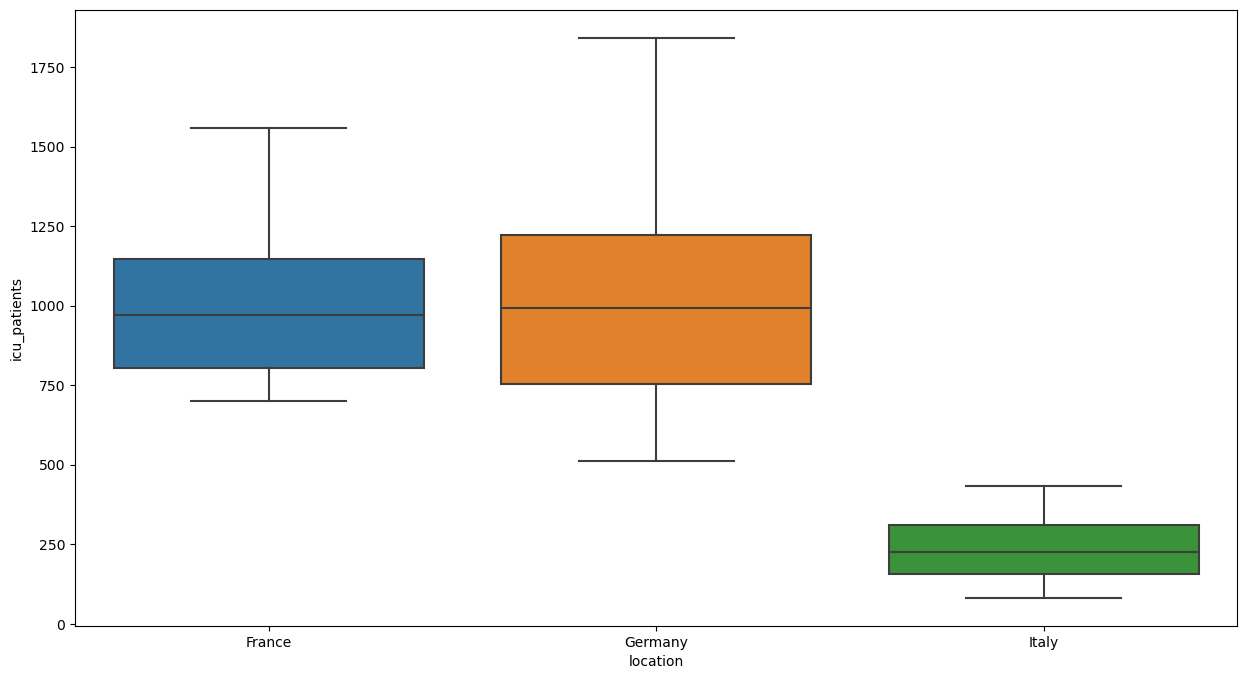

In [17]:
#'icu_patients' : colonna del db con il numero di pazienti in terapia intensiva con indice 17
filtro_nan_icu = db_covid_start.icu_patients.isna()
db_covid_icu = db_covid_start[(~filtro_nan_icu) & (~filtro_nan_continent)]
db_covid_icu = db_covid_icu.iloc[:, [0,1,2,3,4,5,6,17]] #mi creo il db con solo le colonne che mi servono
filtro_italia2 = db_covid_icu.location == "Italy"
filtro_germania = db_covid_icu.location == "Germany"
#db_covid_icu[filtro_germania] #controllo se il filtro è corretto
filtro_francia = db_covid_icu.location == "France"
#db_covid_icu[filtro_francia] #controllo se il filtro è corretto
db_icu_fnazioni = db_covid_icu[filtro_italia2 | filtro_germania | filtro_francia]
#db_icu_fnazioni.location.unique() #mi accerto che ci siano tutte le nazioni
#creo i filtri temporali, cominciando a trasformare la colonna date da object in datetime
db_icu_fnazioni["date"] = pd.to_datetime(db_icu_fnazioni["date"], format = "%Y-%m-%d")
#db_icu_fnazioni.info() #per provare il dtype della colonna "date"
filtro_data1 = db_icu_fnazioni.date >= pd.to_datetime("2022-05-01", format ="%Y-%m-%d")
filtro_data2 = db_icu_fnazioni.date <= pd.to_datetime("2023-04-30", format ="%Y-%m-%d")
filtro_data_tot = filtro_data1 & filtro_data2
#db_icu_fnazioni[filtro_data_tot] #controllo se il filtro è andato a buon fine
db_boxplot_naz = db_icu_fnazioni[filtro_data_tot]
db_boxplot_naz= db_boxplot_naz.loc[:, ["location", "date", "icu_patients"]]
plt.figure(figsize=(15, 8))
sns.boxplot(data = db_boxplot_naz, y="icu_patients", x="location",)


CONSIDERAZIONI: L'Italia nel periodo considerato (da Maggio 2022 ad Aprile 2023) ha avuto molti meno casi ricoverati in terapia intensiva rispetto Francia e Germania che presentano molti più casi ricoverati. La Germania è la nazione che in quel periodo ha più casi mentre segue la Franca con pochi di meno.

COMANDA 6: Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per
ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

La somma dei casi ospedalizzati per nazione nell'anno 2023 è:
 location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

Il dato massimo di casi ospedalizzati per nazione nell'anno 2023 è:
 location
France     24157.0
Germany        NaN
Italy       8409.0
Spain       3585.0
Name: hosp_patients, dtype: float64


C:\Users\Utente\AppData\Local\Temp\ipykernel_4324\3957387510.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_covid_fhosp["date"] = pd.to_datetime(db_covid_fhosp["date"], format = "%Y-%m-%d")
C:\Users\Utente\AppData\Local\Temp\ipykernel_4324\3957387510.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_covid_fhosp["year_date"] = db_covid_fhosp["date"].dt.year
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

<Axes: xlabel='date', ylabel='hosp_patients'>

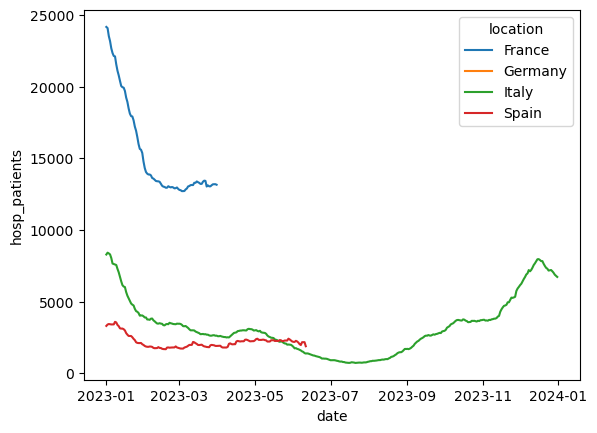

In [28]:
#la colonna che mi serve per svolgere questa comanda è "hosp_patients" con indice 19, mi creo un db quindi solo con le colonne di cui ho bisogno dal db madre che è db_covid_start
db_covid_hosp = db_covid_start.iloc[:, [0,1,2,3,19]]
db_covid_hosp = db_covid_hosp[~filtro_nan_continent]

#mi creo i filtri per nazioni
filtro_italia3 = db_covid_hosp.location == "Italy"
filtro_germania2 = db_covid_hosp.location == "Germany"
filtro_francia2 = db_covid_hosp.location == "France"
filtro_spagna = db_covid_hosp.location == "Spain"
db_covid_fhosp = db_covid_hosp[filtro_italia3| filtro_germania2 | filtro_francia2 | filtro_spagna]
#trasformo la colonna "date" in tipo datetime
db_covid_fhosp["date"] = pd.to_datetime(db_covid_fhosp["date"], format = "%Y-%m-%d")
#db_covid_fhosp.info() # controllo se la trasformazione è avvenuta
db_covid_fhosp["year_date"] = db_covid_fhosp["date"].dt.year
#db_covid_fhosp.info() #guardo di che dtype è la nuova colonna
filtro_data = db_covid_fhosp["year_date"] == 2023 #estrapolo l'anno dalla colonna "date" per poter creare il filtro
db_covid_fhosp = db_covid_fhosp[filtro_data]
fhosp_sum = db_covid_fhosp.groupby("location").hosp_patients.sum()
fhosp_max = db_covid_fhosp.groupby("location").hosp_patients.max()
print("La somma dei casi ospedalizzati per nazione nell'anno 2023 è:\n", fhosp_sum)
print("\nIl dato massimo di casi ospedalizzati per nazione nell'anno 2023 è:\n", fhosp_max)
sns.lineplot(data=db_covid_fhosp, x="date", y="hosp_patients", hue="location")

CONSIDERAZIONI: 
I dati nella colonna "hosp_patients" sono dei dati variabili a seconda di quanti pazienti sono ospedalizzati quel giorno o meno e non quanti pazienti al giorno vengono ospedalizzati, quindi fare la somma è stato creare un dato sballato e non attendibile perchè non reale. 
Ho valutato di trovare il massimo valore di ospedalizzati perchè ci da sicuramente un risultato attendibile e così analizzabile di quanto gli ospedali nell'anno 2023 siano stati occupati rispettivamente per ogni nazione richiesta. Utile all'analisi dei dati è anche un lineplot per nazione che faccia vedere la curva di andamento dei casi ospedalizzati nell'arco temporale. Notare che la Germania non ha comunicato nessun dato di ospedalizzati nell'anno 2023 quindi non si può sapere realmente studiare il dato. 
Si potrebbero sostituire i valori con vari metodi per la gestione dei casi nulli come .interpolate() o .ffill() ma nessuno di questo metodo renderebbe i dati attendibili e veritieri per la durata di un anno, non si può predire un andamento per quanto si tenda a voler che la curva tenda sempre più verso lo zero, il grafico mostra come sia possibile che la curva possa in alcuni punti risalire come nel caso dell'Italia a fine anno 2023. 